# Decision Tree

##### Problem - Predict if a customer will repay loan amount or not?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### 1. Load dataset

In [2]:
data = pd.read_csv('./data/Loan_Repay_Data.csv')
data.replace(np.inf, np.nan)

,Term,Loan Amount,Credit Score,House Number,Paid
0,201,10018,250,3046,yes
1,205,10016,395,3044,yes
2,257,10129,109,3251,yes
3,246,10064,324,3137,yes
4,117,10115,496,3094,yes
...,...,...,...,...,...
995,413,14914,523,4683,No
996,359,14423,927,4838,No
997,316,14872,613,4760,No
998,305,14926,897,4572,No


#### 2. Extract Features - x(All) & y(Paid)

In [3]:
X = data.iloc[:, :3].values

In [4]:
y = data.iloc[:, 4].values

#### 3.Visualize the data

C:\Users\ranja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ranja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


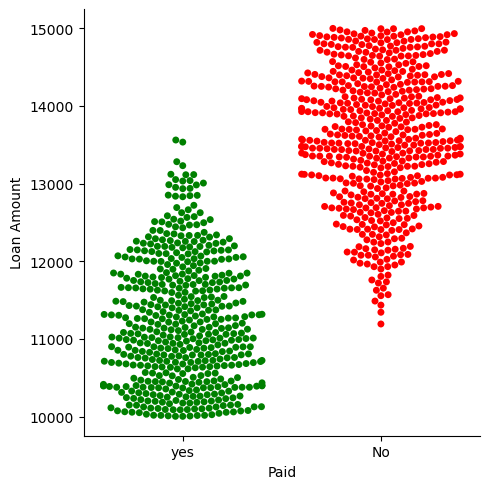

In [5]:
sns.catplot(data, x="Paid", y="Loan Amount", kind='swarm', hue='Paid', palette=['green', 'red'])

#### 4.Split training and test data

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1/3)

#### 5.Train the model

In [19]:
from sklearn import tree
model = tree.DecisionTreeClassifier(random_state=100)
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=100)

#### 5.1 Plot Tree

[Text(0.4942781690140845, 0.9642857142857143, 'x[1] <= 12396.5\ngini = 0.498\nsamples = 666\nvalue = [353, 313]'),
 Text(0.2227112676056338, 0.8928571428571429, 'x[1] <= 11711.0\ngini = 0.187\nsamples = 325\nvalue = [34, 291]'),
 Text(0.07746478873239436, 0.8214285714285714, 'x[1] <= 11333.0\ngini = 0.051\nsamples = 231\nvalue = [6, 225]'),
 Text(0.028169014084507043, 0.75, 'x[0] <= 472.0\ngini = 0.011\nsamples = 186\nvalue = [1, 185]'),
 Text(0.014084507042253521, 0.6785714285714286, 'gini = 0.0\nsamples = 171\nvalue = [0, 171]'),
 Text(0.04225352112676056, 0.6785714285714286, 'x[0] <= 476.5\ngini = 0.124\nsamples = 15\nvalue = [1, 14]'),
 Text(0.028169014084507043, 0.6071428571428571, 'x[1] <= 10606.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.014084507042253521, 0.5357142857142857, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.04225352112676056, 0.5357142857142857, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.056338028169014086, 0.6071428571428571, 'gini = 0.0\

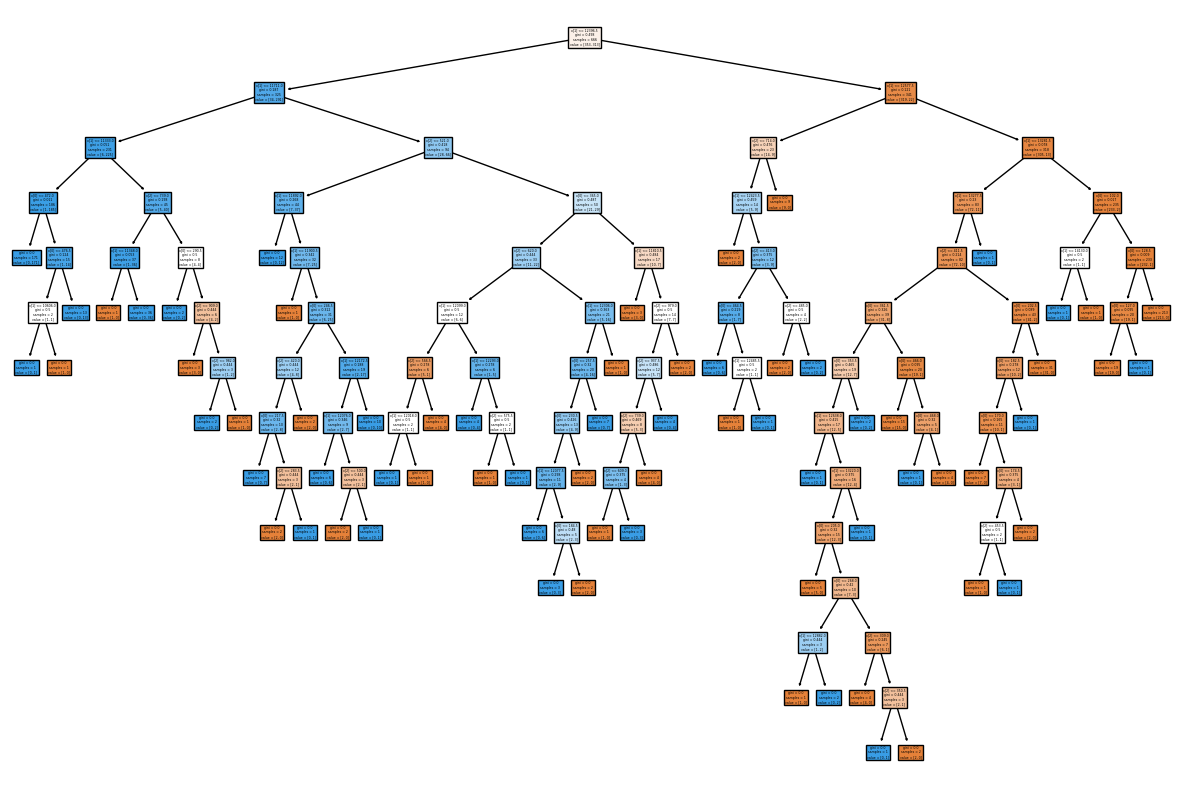

In [32]:
plt.figure(figsize=(15, 10))
tree.plot_tree(model, filled=True)

#### 7.Predict Loan Repayment

In [16]:
y_predict = model.predict(x_test)

C:\Users\ranja\AppData\Local\Temp\ipykernel_31144\1811906731.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(x=y_predict, y=x_test[:, 1], kind='swarm', palette=['red', 'green'])
C:\Users\ranja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ranja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


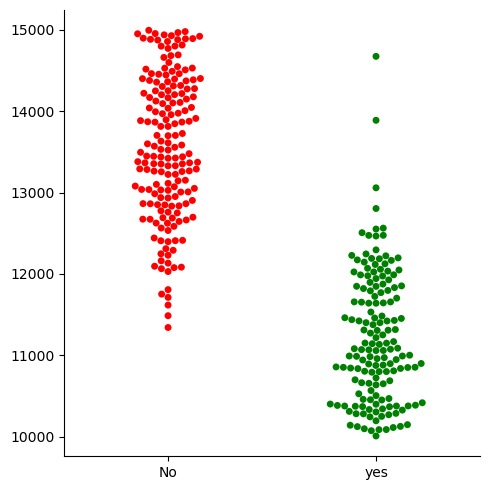

In [17]:
sns.catplot(x=y_predict, y=x_test[:, 1], kind='swarm', palette=['red', 'green'])

#### 8.Evaluate the model using Confusion metrix

In [12]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_predict)
m = matrix.flatten()
matrix

array([[151,  17],
       [ 27, 139]], dtype=int64)

In [13]:
print('Total Data set:', sum(m))

Total Data set: 334


In [14]:
accuracy = int((m[0] + m[3]) / sum(m) * 100)
print(f'Predction Accuracy rate: {accuracy}%')

Predction Accuracy rate: 86%
